In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')
from data.audio_dataset import AudioSpectrogramDataset
from models.WGAN_model.WPGAN import WPGAN
from models.WGAN_model.config import *

import torch
import librosa
import soundfile as sf
from torch.utils.data import DataLoader

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [62]:
# import torchvision.datasets as dset
# import torchvision.transforms as transforms

# image_size = 64
# learning_rate = 0.0002
# # learning_rate = 0.0001

# dataroot = "../data/raw/celeba2/"

# dataset = dset.ImageFolder(root=dataroot,
#                            transform=transforms.Compose([
#                                transforms.Resize(image_size),
#                                transforms.CenterCrop(image_size),
#                                transforms.ToTensor(),
#                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                            ]))

# dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
#                                          shuffle=True, num_workers=2)

In [3]:
dataset = AudioSpectrogramDataset(base_directory=base_directory, spectro_type='mel')
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
Music_WPGAN = WPGAN(
    latent_dim=latent_dim,
    output_dim=output_dim,
    lr=learning_rate,
    loss=loss,
    batch_size=batch_size,
    gpu=gpu,
    depths=depths, 
    negative_slope=negative_slope,
    fade_in_percentage=fade_in_percentage,
    save_interval=save_interval,
    normalization=normalization,
    mini_batch_normalization=mini_batch_normalization,
    gen_type=get_type,
    init_resolution_size=init_resolution_size,
    num_epochs_per_resolution=num_epochs_per_resolution,
    gen_output_dim=gen_output_dim,
    c=c,
    n_critic=n_critic
)

In [5]:
Music_WPGAN.train(dataloader=dataloader)

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Resolution 0 - Epoch 1/50 - D Loss: -0.08549068123102188 - G Loss: -0.0010684113949537277
Resolution 0 - Epoch 2/50 - D Loss: -0.1323084682226181 - G Loss: 0.00832037627696991
Resolution 0 - Epoch 3/50 - D Loss: -0.2161049246788025 - G Loss: 0.022078631445765495
Resolution 0 - Epoch 4/50 - D Loss: -0.3852100968360901 - G Loss: 0.045715875923633575
Resolution 0 - Epoch 5/50 - D Loss: -0.6976503133773804 - G Loss: 0.08436118066310883
Resolution 0 - Epoch 6/50 - D Loss: -1.2255860567092896 - G Loss: 0.14212746918201447
Resolution 0 - Epoch 7/50 - D Loss: -2.0532331466674805 - G Loss: 0.22331517934799194
Resolution 0 - Epoch 8/50 - D Loss: -3.2531940937042236 - G Loss: 0.3231072425842285
Resolution 0 - Epoch 9/50 - D Loss: -4.880171775817871 - G Loss: 0.450260728597641
Resolution 0 - Epoch 10/50 - D Loss: -6.961306571960449 - G Loss: 0.6089673042297363
Resolution 0 - Epoch 11/50 - D Loss: -9.507447242736816 - G Loss: 0.7905138731002808
Resolution 0 - Epoch 12/50 - D Loss: -12.5172977447509

In [ ]:
checkpoint_path = "../src/models/WGAN_model/checkpoints/PGAN_checkpoint_res1_epoch4.pth"
Music_WPGAN.train(dataloader=dataloader, checkpoint_path=checkpoint_path)

In [6]:
Music_WPGAN.close_all_writers()

In [91]:
Music_WPGAN.save_full_model("WPGAN")

Full model saved: c:\0. Studia\0. Praca inzynierska\Music_Samples_Generator\src\models\WGAN_model\../../../models/saved_models/WPGAN/WPGAN


In [7]:
Music_WPGAN.generator.eval()

PGenerator(
  (blocks): ModuleList(
    (0): ModuleList(
      (0): Sequential(
        (0): ConvTranspose2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.2)
      )
      (1): Sequential(
        (0): ConvTranspose2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.2)
      )
      (2): Sequential(
        (0): Conv2d(256, 1, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (1): ModuleList(
      (0): Sequential(
        (0): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.2)
      )
      (1): Sequential(
        (0): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): LeakyReLU(negative_slope=0.2)
      )
      (2): Sequential(
        (0): Conv2d(128, 1, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (2): ModuleList(
      (0): Sequential(
        (0): ConvTrans

In [8]:
z = torch.randn(1, Music_WPGAN.latent_dim, 1, 1).to(Music_WPGAN.device)
generated_spectrogram = Music_WPGAN.generator(z)

In [9]:
spectrogram = generated_spectrogram.cpu().detach().numpy()
spectrogram = spectrogram.squeeze()

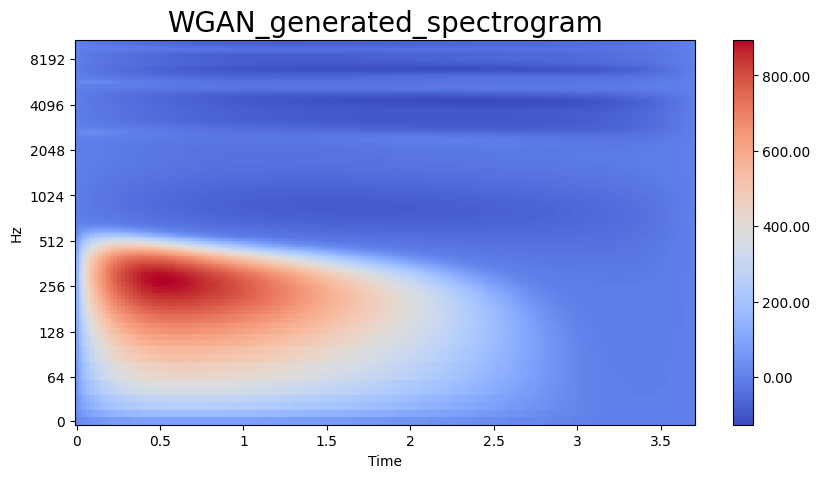

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

img = librosa.display.specshow(spectrogram, x_axis='time', y_axis='log')
plt.title('WGAN_generated_spectrogram', fontsize=20)
plt.colorbar(img, format='%0.2f')

plt.show()

In [11]:
audio = librosa.feature.inverse.mel_to_audio(spectrogram)

path = '../models/generated_samples/'
file_name = 'WPGAN_generated_audio9.wav'

sf.write(path + file_name, audio, 22050)

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\feature\inverse.py:99: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(
